In [1]:
from sklearn import datasets
import sqlite3 as sqlite
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Regression data from scklearn

In [2]:
ch = datasets.fetch_california_housing()
cali_housing = pd.DataFrame(data= np.c_[ch['data'], ch['target']],
                     columns= ch['feature_names'] + ['MedHouseVal'])
cali_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [3]:
conn_sql = sqlite.connect('MasterAll.db')
cali_housing.to_sql('cali_housing', con=conn_sql, if_exists='replace', index=False)

#reload the inserted data
cali_housing = pd.read_sql('SELECT * FROM cali_housing', conn_sql)
cali_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
cali_housing.to_csv('dbs/cali_housing.csv', index=False)

In [27]:
conn_sql.commit()

In [28]:
#shape and dimension of dataframe cali_housing
print('Shape: ', cali_housing.shape)
print('Dimensions: ', cali_housing.ndim)

Shape:  (20640, 9)
Dimensions:  2


In [29]:
#checking types of data contained in dataframe
cali_housing.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [30]:
#check if any column has missing/nan values
(cali_housing.isnull().values.any())
#cali_housing[cali_housing.isnull().any(axis=1)]

False

Text(0.5, 1.0, 'Histogram of House value medium')

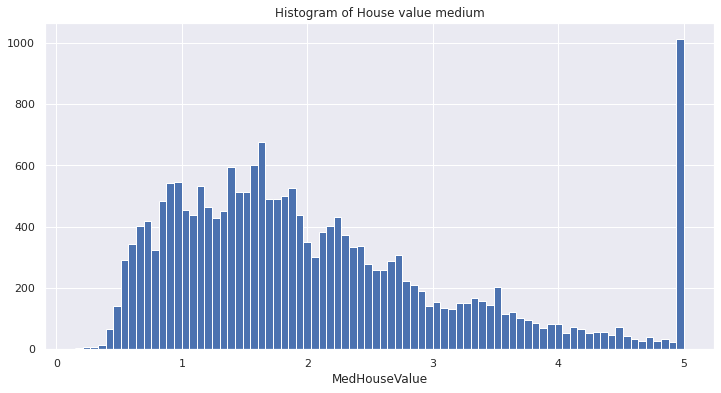

In [49]:
plt.figure(figsize=(12, 6))

plt.hist(cali_housing.MedHouseVal, bins=80)
plt.xlabel('MedHouseValue')
plt.title("Histogram of House value medium")

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
m = ols('HouseAge ~ MedHouseVal',cali_housing).fit()
print (m.summary())

                            OLS Regression Results                            
Dep. Variable:               HouseAge   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     232.8
Date:                Thu, 20 May 2021   Prob (F-statistic):           2.76e-52
Time:                        01:18:44   Log-Likelihood:                -81442.
No. Observations:               20640   AIC:                         1.629e+05
Df Residuals:                   20638   BIC:                         1.629e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      26.2566      0.179    146.833      

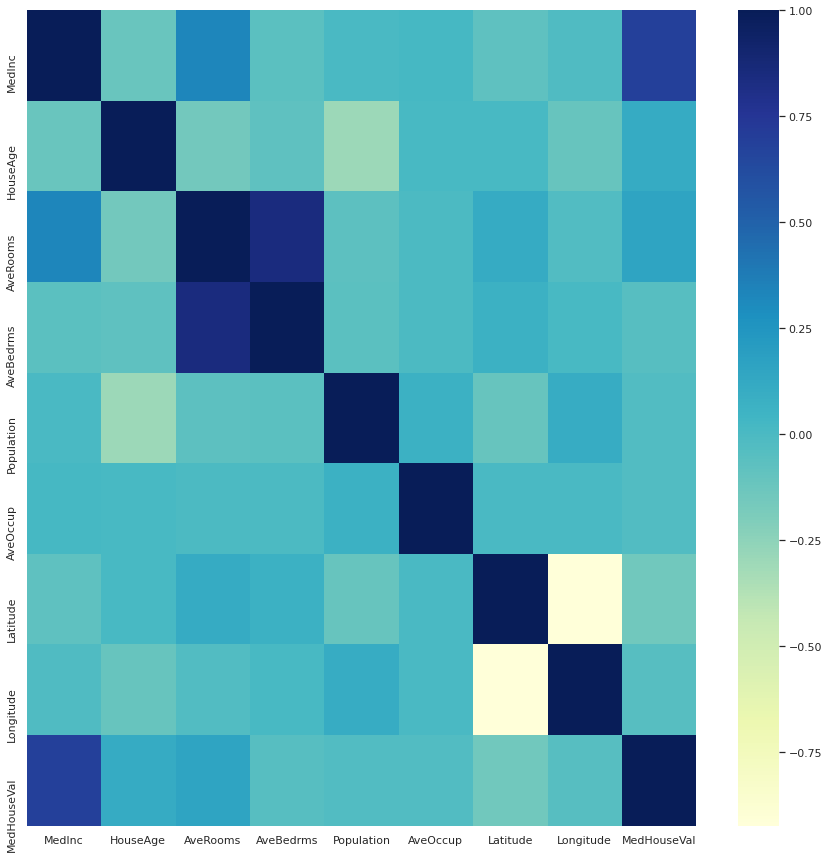

In [39]:
import seaborn as sns
correlations_cali_housing = cali_housing.corr()
sns.heatmap(correlations_cali_housing, cmap="YlGnBu")
plt.show()

In [41]:
cali_housing.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [42]:
#we define our target and features
X = cali_housing[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
                 'AveOccup', 'Latitude', 'Longitude']]
y = cali_housing['MedHouseVal']

from sklearn.model_selection import train_test_split

test_size = 0.3
seed = 78
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import classification_report
import time


In [72]:
#Training the models and measuring duration
start_time_lr = time.time()
lr = LinearRegression().fit(x_train, y_train)
predictions_lr = lr.predict(x_test)
elapsed_time_lr = time.time() - start_time_lr

start_time_br = time.time()
br = BayesianRidge().fit(x_train, y_train)
predictions_br = br.predict(x_test)
elapsed_time_br = time.time() - start_time_br

start_time_svr = time.time()
svr = SVR().fit(x_train, y_train)
predictions_svr = svr.predict(x_test)
elapsed_time_svr = time.time() - start_time_svr

start_time_knn = time.time()
knn = KNeighborsRegressor().fit(x_train, y_train)
predictions_knn = knn.predict(x_test)
elapsed_time_knn = time.time() - start_time_knn

start_time_dtr = time.time()
dtr = DecisionTreeRegressor().fit(x_train, y_train)
predictions_dtr = dtr.predict(x_test)
elapsed_time_dtr = time.time() - start_time_dtr

start_time_en = time.time()
en = ElasticNet().fit(x_train, y_train)
predictions_en = en.predict(x_test)
elapsed_time_en = time.time() - start_time_en

start_time_gbr = time.time()
gbr = GradientBoostingRegressor().fit(x_train, y_train)
predictions_gbr = gbr.predict(x_test)
elapsed_time_gbr = time.time() - start_time_gbr

In [60]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions_lr})
df

,Real Values,Predicted Values
19209,1.694,1.770339
12791,1.034,1.139853
18581,1.948,2.202543
19661,0.973,1.299537
10007,1.568,0.823558
...,...,...
1931,2.175,1.779618
17550,1.837,2.004755
1130,0.967,0.867301
20320,1.868,2.567784


In [73]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("Logistic regression: \ntime: %.3f" % elapsed_time_lr)
mse_lr = mean_squared_error(y_test, predictions_lr)
rmse_lr = mean_squared_error(y_test, predictions_lr, squared=False)
mae_lr = mean_absolute_error(y_test, predictions_lr)
print(f"MSE: %.4f\nRMSE: %.4f\nMAE: %.4f" % (mse_lr, rmse_lr, mae_lr))

print("\nBayesianRidge: \ntime: %.3f" % elapsed_time_br)
mse_br = mean_squared_error(y_test, predictions_br)
rmse_br = mean_squared_error(y_test, predictions_br, squared=False)
mae_br = mean_absolute_error(y_test, predictions_br)
print(f"MSE: %.4f\nRMSE: %.4f\nMAE: %.4f" % (mse_br, rmse_br, mae_br))

print("\nSVR: \ntime: %.3f" % elapsed_time_svr)
mse_svr = mean_squared_error(y_test, predictions_svr)
rmse_svr = mean_squared_error(y_test, predictions_svr, squared=False)
mae_svr = mean_absolute_error(y_test, predictions_svr)
print(f"MSE: %.4f\nRMSE: %.4f\nMAE: %.4f" % (mse_svr, rmse_svr, mae_svr))

print("\nKNeighborsRegressor: \ntime: %.3f" % elapsed_time_knn)
mse_knn = mean_squared_error(y_test, predictions_knn)
rmse_knn = mean_squared_error(y_test, predictions_knn, squared=False)
mae_knn = mean_absolute_error(y_test, predictions_knn)
print(f"MSE: %.4f\nRMSE: %.4f\nMAE: %.4f" % (mse_knn, rmse_knn, mae_knn))

print("\nDecisionTreeRegressor: \ntime: %.3f" % elapsed_time_dtr)
mse_dtr = mean_squared_error(y_test, predictions_dtr)
rmse_dtr = mean_squared_error(y_test, predictions_dtr, squared=False)
mae_dtr = mean_absolute_error(y_test, predictions_dtr)
print(f"MSE: %.4f\nRMSE: %.4f\nMAE: %.4f" % (mse_dtr, rmse_dtr, mae_dtr))

print("\nElasticNet: \ntime: %.3f" % elapsed_time_en)
mse_en = mean_squared_error(y_test, predictions_en)
rmse_en = mean_squared_error(y_test, predictions_en, squared=False)
mae_en = mean_absolute_error(y_test, predictions_en)
print(f"MSE: %.4f\nRMSE: %.4f\nMAE: %.4f" % (mse_en, rmse_en, mae_en))

print("\nGradientBoostingRegressor: \ntime: %.3f" % elapsed_time_gbr)
mse_gbr = mean_squared_error(y_test, predictions_gbr)
rmse_gbr = mean_squared_error(y_test, predictions_gbr, squared=False)
mae_gbr = mean_absolute_error(y_test, predictions_gbr)
print(f"MSE: %.4f\nRMSE: %.4f\nMAE: %.4f" % (mse_gbr, rmse_gbr, mae_gbr))

Logistic regression: 
time: 0.018
MSE: 0.5118
RMSE: 0.7154
MAE: 0.5301

BayesianRidge: 
time: 0.031
MSE: 0.5118
RMSE: 0.7154
MAE: 0.5301

SVR: 
time: 20.883
MSE: 1.3454
RMSE: 1.1599
MAE: 0.8659

KNeighborsRegressor: 
time: 0.071
MSE: 1.1377
RMSE: 1.0666
MAE: 0.8264

DecisionTreeRegressor: 
time: 0.237
MSE: 0.4982
RMSE: 0.7058
MAE: 0.4571

ElasticNet: 
time: 0.013
MSE: 0.7517
RMSE: 0.8670
MAE: 0.6738

GradientBoostingRegressor: 
time: 5.359
MSE: 0.2780
RMSE: 0.5273
MAE: 0.3653
